# William Vann - Homework 6

### **Principal Findings:**

(1) My linear regression analysis for a random sample of approximately 500 world cities shows a strong correlation between **temperature** and **distance from the equator**. 

(2) The first scatter plot in the WeatherPy notebook nicely visualizes that temperatures go up as you get nearer to the equator (latitude = 0), and go down as you get further from the equator.

(3) Additional linear regression analyses on this dataset show no meaningful correlations between latitude and the following features: _humidity, cloudiness, wind speed_.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup

import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr
from pprint import pprint

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)

today_date = datetime.date.today()
output_data_file = f"../output_data/worldcities_{today_date}.csv"

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Populate cities_dict with imperial weather data from OpenWeatherMap API
    
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
units = "imperial"

api_call_log = f"../output_data/api_call_log{today_date}.txt"

cities_dict = {}

with open(api_call_log, "a") as logfile:
    
    for num,city in enumerate(cities):

        query_url = f"{base_url}appid={api_key}&q={city}&units={units}"

        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Structure and initialize cities_dict

        cities_dict[city] = {

                "JSON": weather_json, "DATE": "NULL", "CITY": "NULL", "COUNTRY": "NULL",
                "LAT": 0.0, "LNG": 0.0, "MAX_TEMP": 0.0, "HUMIDITY": 0.0, 
                "CLOUDINESS": 0.0, "WIND_SPEED": 0.0    

                            }

        # Add relevant data points from json to cities_dict

        try:

            cities_dict[city]["DATE"] = weather_json["dt"]
            cities_dict[city]["CITY"] = weather_json["name"]
            cities_dict[city]["COUNTRY"] = weather_json["sys"]["country"]         
            cities_dict[city]["LAT"] = weather_json["coord"]["lat"]
            cities_dict[city]["LNG"] = weather_json["coord"]["lon"]
            cities_dict[city]["MAX_TEMP"] = weather_json["main"]["temp"]
            cities_dict[city]["HUMIDITY"] = weather_json["main"]["humidity"]
            cities_dict[city]["CLOUDINESS"] = weather_json["clouds"]["all"]     
            cities_dict[city]["WIND_SPEED"] =  weather_json["wind"]["speed"]

        except (KeyError, IndexError):

            print(f"{num} Info missing for {city} ... skipping!")
            logfile.write(f"{num} Info missing for {city} ... skipping!\n")
            continue

        else:

            print(f"{num} Working on {city} ...")
            logfile.write(f"{num} Working on {city} ...\n")

        finally:

            # timeout

            time.sleep(1.5)

    print(f"DONE!")
    logfile.write(f"DONE!\n")

0 Working on norman wells ...
1 Working on port elizabeth ...
2 Info missing for yeletskiy ... skipping!
3 Working on salinopolis ...
4 Working on college ...
5 Working on pangnirtung ...
6 Working on hermanus ...
7 Working on yatou ...
8 Working on hasaki ...
9 Working on iqaluit ...
10 Working on rikitea ...
11 Working on laguna ...
12 Working on vaini ...
13 Working on cheney ...
14 Working on chokurdakh ...
15 Working on bredasdorp ...
16 Info missing for taolanaro ... skipping!
17 Working on ushuaia ...
18 Working on punta arenas ...
19 Working on batemans bay ...
20 Working on burnie ...
21 Working on hobart ...
22 Info missing for sentyabrskiy ... skipping!
23 Working on kavaratti ...
24 Info missing for barentsburg ... skipping!
25 Working on omsukchan ...
26 Working on longyearbyen ...
27 Working on kaitangata ...
28 Working on awbari ...
29 Working on saint-honore ...
30 Working on saint-philippe ...
31 Working on yellowknife ...
32 Working on kruisfontein ...
33 Working on d

279 Working on yenagoa ...
280 Working on peniche ...
281 Working on boca do acre ...
282 Working on yairipok ...
283 Working on broome ...
284 Info missing for utiroa ... skipping!
285 Working on narsaq ...
286 Working on chapais ...
287 Working on high level ...
288 Working on roald ...
289 Working on poya ...
290 Working on pisco ...
291 Info missing for bokspits ... skipping!
292 Working on alabaster ...
293 Working on hami ...
294 Working on inhambane ...
295 Working on dharchula ...
296 Working on hamilton ...
297 Working on marale ...
298 Working on felanitx ...
299 Working on ubinskoye ...
300 Working on shimoda ...
301 Working on zhangjiakou ...
302 Working on maniitsoq ...
303 Working on te anau ...
304 Working on cayenne ...
305 Info missing for dianopolis ... skipping!
306 Working on kutum ...
307 Working on sharya ...
308 Working on portland ...
309 Working on waitati ...
310 Working on warwick ...
311 Working on lubango ...
312 Working on uga ...
313 Working on yeppoon ..

555 Working on yubari ...
556 Working on yichun ...
557 Working on grand gaube ...
558 Working on hanzhong ...
559 Working on promyshlennaya ...
560 Working on turukhansk ...
561 Working on guanare ...
562 Info missing for ebano ... skipping!
563 Working on shakawe ...
564 Working on aguas vermelhas ...
565 Working on lagarto ...
566 Working on kisangani ...
567 Working on west bay ...
568 Working on kailua ...
569 Working on aquidauana ...
570 Working on shubarshi ...
571 Working on denpasar ...
572 Working on fukuma ...
573 Working on richards bay ...
574 Working on dire dawa ...
575 Working on fiche ...
576 Working on kloulklubed ...
577 Working on khash ...
578 Working on nan ...
579 Working on kalmunai ...
580 Working on apiai ...
581 Working on natal ...
582 Info missing for tlahualilo ... skipping!
583 Working on zhangye ...
584 Working on wewak ...
585 Working on pitea ...
586 Working on miramar ...
587 Working on ransang ...
588 Working on luderitz ...
589 Working on wamba ...

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame([cities_dict[city] for city in cities_dict.keys()])

# Toss the rows where all needed api data not available

df_ = df.loc[(df["DATE"] != "NULL"), :]

df_.head()

In [5]:
df = df_.copy()

df.to_csv(output_data_file)

In [11]:
# Breakpoint for loading previously fetched api data

cityweather_df = pd.read_csv(output_data_file)


cityweather_df.head()

# TEST:

# cityweather_df["CITY"].nunique() == len(cityweather_df)

True

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# chaining calls on cityweather_df to check humidity > 100%

(cityweather_df

     .HUMIDITY
     .gt(100)
     .sum()
)

0

In [13]:
#  Get the indices of cities that have humidity over 100%.

# N/A

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

cityweather_df

,Unnamed: 0,JSON,DATE,CITY,COUNTRY,LAT,LNG,MAX_TEMP,HUMIDITY,CLOUDINESS,WIND_SPEED
0,0,"{'coord': {'lon': -126.8329, 'lat': 65.282}, '...",1659562031,Norman Wells,CA,65.2820,-126.8329,60.84,72.0,75.0,12.66
1,1,"{'coord': {'lon': 25.5701, 'lat': -33.918}, 'w...",1659561930,Port Elizabeth,ZA,-33.9180,25.5701,59.29,72.0,0.0,6.91
2,3,"{'coord': {'lon': -47.3561, 'lat': -0.6136}, '...",1659562186,Salinópolis,BR,-0.6136,-47.3561,80.40,79.0,65.0,12.30
3,4,"{'coord': {'lon': -147.8028, 'lat': 64.8569}, ...",1659562188,College,US,64.8569,-147.8028,68.95,64.0,40.0,4.61
4,5,"{'coord': {'lon': -65.7125, 'lat': 66.1451}, '...",1659562177,Pangnirtung,CA,66.1451,-65.7125,50.00,71.0,75.0,5.75
...,...,...,...,...,...,...,...,...,...,...,...
556,609,"{'coord': {'lon': -1.353, 'lat': 60.3964}, 'we...",1659563260,Brae,GB,60.3964,-1.3530,51.75,81.0,46.0,13.94
557,610,"{'coord': {'lon': -70.1431, 'lat': -20.2208}, ...",1659563262,Iquique,CL,-20.2208,-70.1431,60.84,77.0,6.0,9.89
558,611,"{'coord': {'lon': 28.6617, 'lat': 56.7105}, 'w...",1659563263,Opochka,RU,56.7105,28.6617,59.02,82.0,68.0,1.28
559,612,"{'coord': {'lon': -76.2, 'lat': 24.9}, 'weathe...",1659563265,Rock Sound,BS,24.9000,-76.2000,82.54,72.0,24.0,11.95


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The Pearson r correlation between both factors is -0.57


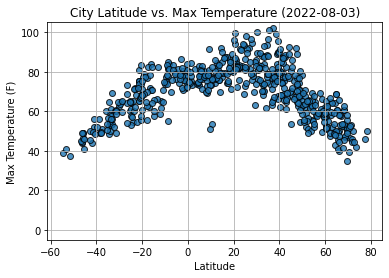

In [15]:
plt.scatter(cityweather_df["LAT"], cityweather_df["MAX_TEMP"], alpha=0.8, edgecolors="black")

plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(-5,105)
plt.grid(True)

plt.savefig(f"../output_data/TempsInWorldCities_{today_date}.png")

# Correlation test

# Using .abs() function here on lats so negative values don't skew correlation calc

lat_temp_corr = pearsonr(cityweather_df["LAT"].abs(), cityweather_df["MAX_TEMP"])
print(f"The Pearson r correlation between both factors is {round(lat_temp_corr[0],2)}")

# Show plot

plt.show()

This plot visualizes how **temperature** is related to distance from the equator (i.e., **latitude**) for a random sample of approximately 500 world cities. 

It appears to show - as we would expect - that **temperatures go up as you get nearer to the equator (latitude = 0), and go down as you get further from the equator**. 

## Latitude vs. Humidity Plot

The Pearson r correlation between both factors is -0.03


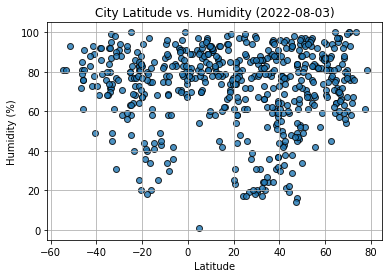

In [16]:
plt.scatter(cityweather_df["LAT"], cityweather_df["HUMIDITY"], alpha=0.8, edgecolors="black")

plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-5,105)
plt.grid(True)

plt.savefig(f"../output_data/TempsInWorldCities_{today_date}.png")

# Correlation test

lat_humid_corr = pearsonr(cityweather_df["LAT"], cityweather_df["HUMIDITY"])
print(f"The Pearson r correlation between both factors is {round(lat_humid_corr[0],2)}")

# Show plot

plt.show()

This plot visualizes how **humidity** is related to distance from the equator (i.e., **latitude**) for a random sample of approximately 500 world cities. 

There does not appear to be any detectable relationship, as the Pearson r value suggests. 

## Latitude vs. Cloudiness Plot

The Pearson r correlation between both factors is 0.05


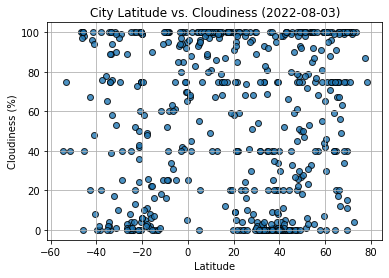

In [17]:
plt.scatter(cityweather_df["LAT"], cityweather_df["CLOUDINESS"], alpha=0.8, edgecolors="black")

plt.title(f"City Latitude vs. Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(True)

plt.savefig(f"../output_data/TempsInWorldCities_{today_date}.png")

# Correlation test

lat_cloud_corr = pearsonr(cityweather_df["LAT"], cityweather_df["CLOUDINESS"])
print(f"The Pearson r correlation between both factors is {round(lat_cloud_corr[0],2)}")

# Show plot

plt.show()

This plot visualizes how **cloudiness** is related to distance from the equator (i.e., **latitude**) for a random sample of approximately 500 world cities. 

There does not appear to be any detectable relationship, as the Pearson r value suggests. 

## Latitude vs. Wind Speed Plot

The Pearson r correlation between both factors is -0.06


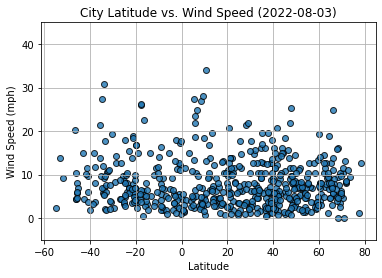

In [18]:
plt.scatter(cityweather_df["LAT"], cityweather_df["WIND_SPEED"], alpha=0.8, edgecolors="black")

plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,45)
plt.grid(True)

plt.savefig(f"../output_data/TempsInWorldCities_{today_date}.png")

# Correlation test

lat_wind_corr = pearsonr(cityweather_df["LAT"], cityweather_df["WIND_SPEED"])
print(f"The Pearson r correlation between both factors is {round(lat_wind_corr[0],2)}")

# Show plot

plt.show()

This plot visualizes how **wind speed** is related to distance from the equator (i.e., **latitude**) for a random sample of approximately 500 world cities. 

There does not appear to be any detectable relationship, as the Pearson r value suggests. 

## Linear Regression

In [19]:
# assign 0 to all cities

cityweather_df["HEMISPHERE"] = 0

# assign 1 to only Northern Hemisphere cities

cityweather_df.loc[(cityweather_df["LAT"] >= 0), "HEMISPHERE"] = 1

# named series for regressions

northern_latitudes = cityweather_df["HEMISPHERE"] == 1
southern_latitudes = cityweather_df["HEMISPHERE"] == 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value = -0.6893
The p-value = 1.1075034971758716e-56
The p-value is less than 0.05 = True
The std-error = 0.025


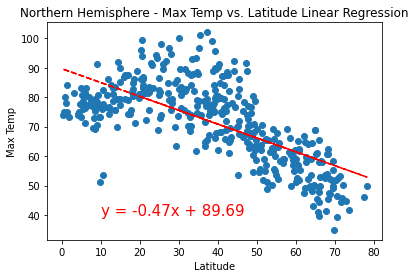

In [20]:
# Get relevant series from df

maxtemps = cityweather_df[northern_latitudes]["MAX_TEMP"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, maxtemps) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, maxtemps)
plt.plot(latitudes, a_fit, "--", color="red")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.savefig(f"../output_data/TempsLinReg_N_{today_date}.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value = 0.8445
The p-value = 6.980134723199017e-47
The p-value is less than 0.05 = True
The std-error = 0.0367


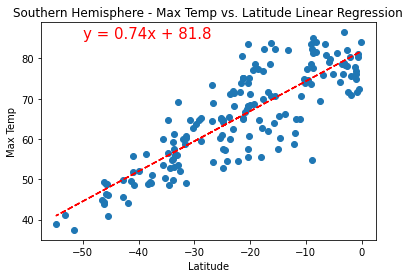

In [21]:
# Get relevant series from df

maxtemps = cityweather_df[southern_latitudes]["MAX_TEMP"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, maxtemps) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, maxtemps)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, -10, -20, -30, -40, -50])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (-50,85), fontsize=15, color="red")
plt.savefig(f"../output_data/TempsLinReg_S_{today_date}.png")
plt.show()

The two previous linear regressions are testing for correlation between **temperature** and **distance from the equator**. 

The r-values for the Northern Hemisphere and Southern Hemisphere suggest a **strong correlation**. As you approach the equator, temperatures trend upward. As you move away from the equator, temperatures trend downward. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value = 0.007
The p-value = 0.890272445610766
The p-value is less than 0.05 = False
The std-error = 0.0529


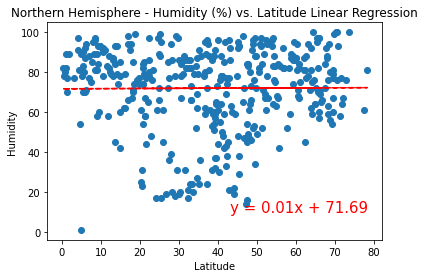

In [22]:
# Get relevant series from df

humidities = cityweather_df[northern_latitudes]["HUMIDITY"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, humidities) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, humidities)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (43,10), fontsize=15, color="red")
plt.savefig(f"../output_data/HumidLinReg_N_{today_date}.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value = -0.0998
The p-value = 0.19806809384594012
The p-value is less than 0.05 = False
The std-error = 0.1046


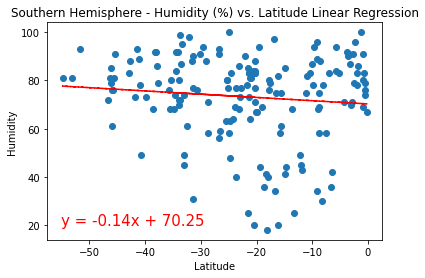

In [23]:
# Get relevant series from df

humidities = cityweather_df[southern_latitudes]["HUMIDITY"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, humidities) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, humidities)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, -10, -20, -30, -40, -50])
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (-55,20), fontsize=15, color="red")
plt.savefig(f"../output_data/HumidLinReg_S_{today_date}.png")
plt.show()

The two previous linear regressions are testing for correlation between **humidity** and **distance from the equator**. The low r-values for the Northern Hemisphere and Southern Hemisphere suggest **no correlation**. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value = -0.0606
The p-value = 0.23077777235960661
The p-value is less than 0.05 = False
The std-error = 0.1008


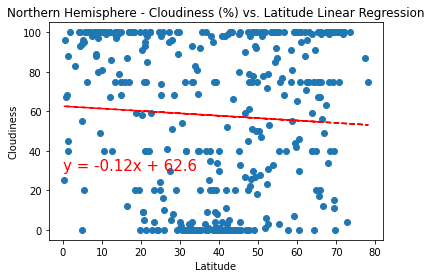

In [29]:
# Get relevant series from df

cloudinesses = cityweather_df[northern_latitudes]["CLOUDINESS"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, cloudinesses) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, cloudinesses)
plt.plot(latitudes, a_fit, "--", color="red")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (0,30), fontsize=15, color="red")
plt.savefig(f"../output_data/CloudLinReg_N_{today_date}.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value = 0.0419
The p-value = 0.5892597730048844
The p-value is less than 0.05 = False
The std-error = 0.2238


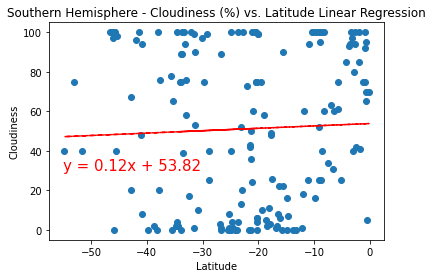

In [28]:
# Get relevant series from df

cloudinesses = cityweather_df[southern_latitudes]["CLOUDINESS"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, cloudinesses) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, cloudinesses)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, -10, -20, -30, -40, -50])
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (-55,30), fontsize=15, color="red")
plt.savefig(f"../output_data/CloudLinReg_S_{today_date}.png")

plt.show()

The two previous linear regressions are testing for correlation between **cloudiness** and **distance from the equator**. The low r-values for the Northern Hemisphere and Southern Hemisphere suggest **no correlation**. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value = -0.0405
The p-value = 0.42320457666005196
The p-value is less than 0.05 = False
The std-error = 0.0139


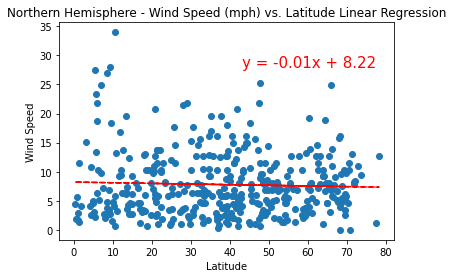

In [26]:
# Get relevant series from df

windspeeds = cityweather_df[northern_latitudes]["WIND_SPEED"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, windspeeds) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, windspeeds)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (43,28), fontsize=15, color="red")
plt.savefig(f"../output_data/WindLinReg_N_{today_date}.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value = -0.0993
The p-value = 0.20047514796178284
The p-value is less than 0.05 = False
The std-error = 0.0326


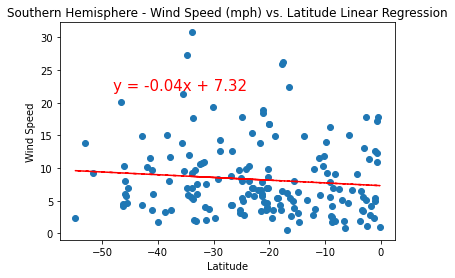

In [27]:
# Get relevant series from df

windspeeds = cityweather_df[southern_latitudes]["WIND_SPEED"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

# Calc linear regression

a_slope, a_int, a_r, a_p, a_std_err = linregress(latitudes, windspeeds) 
a_fit = a_slope * latitudes + a_int 

# Plot linear regression over scatter plot

plt.scatter(latitudes, windspeeds)
plt.plot(latitudes, a_fit,  "--", color="red")

plt.xticks([0, -10, -20, -30, -40, -50])
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Report stats

print(f"The r-value = {round(a_r, 4)}")
print(f"The p-value = {a_p}")
print(f"The p-value is less than 0.05 = {a_p < 0.05}")
print(f"The std-error = {round(a_std_err, 4)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"
plt.annotate(line_eq, (-48,22), fontsize=15, color="red")
plt.savefig(f"../output_data/CloudLinReg_S_{today_date}.png")

plt.show()

The two previous linear regressions are testing for correlation between **wind speed** and **distance from the equator**. The low r-values for the Northern Hemisphere and Southern Hemisphere suggest **no correlation**. 